<center>МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ
<center>НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
<center>"КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ імені Ігоря Сікорського"
<center>Кафедра біомедичної інженерії

<cener>Компʼютерний практикум №5

<center>з дисципліни "Обробка та аналіз біомедичних даних"
<center>на тему "Критерій Пірсона"
<center>14 варіант


<right>виконала:
<br>
<right>студентка групи БС-12
<br>
<right>Сипко В.І
<center>Київ-2023

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Завантажити дані згідно варіанту.

In [53]:
data = pd.read_csv('heart.csv')
critical_values = pd.read_excel('critical_value.xlsx')

In [54]:
data.head()

,Age-group,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,45-55,M,ASY,Hypertoniia,N,Normal,low,N,Flat,Y
1,56-65,M,ASY,Hypertoniia,N,Normal,low,Y,Up,Y
2,56-65,M,ASY,Hypertoniia,Y,ST,low,N,Flat,Y
3,56-65,M,ASY,Hypertoniia,Y,Normal,low,N,Down,N
4,56-65,M,NAP,Hypertoniia,Y,ST,low,N,Flat,Y


In [55]:
critical_values.columns = critical_values.columns.str.replace('Unnamed: 0', '0')
critical_values.columns = critical_values.columns.str.replace('Unnamed: 2', '2')
critical_values.head()

,0,Рівень значимості,2
0,Число ступенів свободи,0.01,0.05
1,1,6.60,3.8
2,2,9.20,6
3,3,11.30,7.8
4,4,13.30,9.5


2. Побудувати графік, що відображає розподіл ознак в групах.

Text(0.5, 1.0, 'MaxHR Distribution for N (no heart disease)')

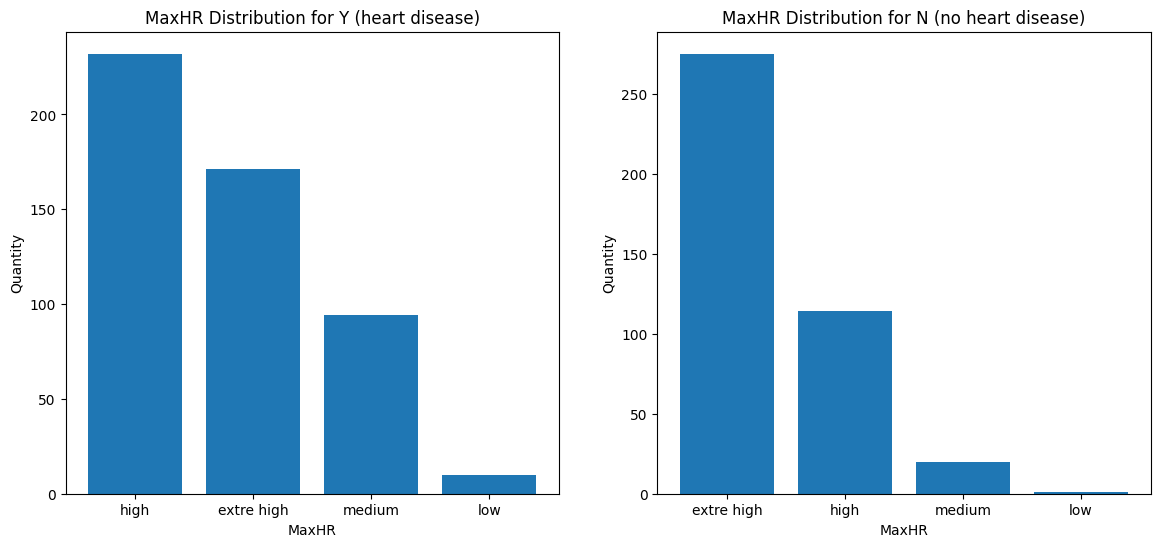

In [56]:
my_data = data[['HeartDisease', 'MaxHR']]

my_data_y = my_data[my_data['HeartDisease'] == 'Y']
my_data_n = my_data[my_data['HeartDisease'] == 'N']

counts_y = my_data_y['MaxHR'].value_counts()
counts_n = my_data_n['MaxHR'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(counts_y.index, counts_y.values)
ax[0].set_xlabel('MaxHR')
ax[0].set_ylabel('Quantity')
ax[0].set_title('MaxHR Distribution for Y (heart disease)')

ax[1].bar(counts_n.index, counts_n.values)
ax[1].set_xlabel('MaxHR')
ax[1].set_ylabel('Quantity')
ax[1].set_title('MaxHR Distribution for N (no heart disease)')


3. Написати функцію, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [57]:
def pirson(dataset, group, feature, significant_level):
  my_data = dataset[[group, feature]]

  groups = list(my_data[group].unique())
  rows = list(my_data[feature].unique())
  rows.append('all')

  global df
  df = pd.DataFrame(columns=groups, index=rows)
  for i in range(len(groups)):
    my_data_1 = my_data[my_data[group] == groups[i]]
    counts = my_data_1.groupby(feature).count()
    df[groups[i]] = counts[group]
    df[groups[i]]['all'] = len(my_data_1)
  df['all'] = [df[groups[0]][j] + df[groups[1]][j] for j in range(5)]
  print('Початкова таблиця спряженості')
  print(df)

  df_frequencies = pd.DataFrame(columns=groups, index=[my_data[feature].unique()])
  for i in range(len(groups)):
    part = round((df[groups[i]]['all']*100/df['all']['all']), 1)
    for j in range(len(df['all']) - 1):
      df_frequencies[groups[i]][j] = round((df['all'][j]/100*part), 1)
  print("\nТаблиця спряженості (частоти)")
  print(df_frequencies)
  df_frequencies["(ni - n'i)^2"] = [(df_frequencies[groups[0]][i] - df_frequencies[groups[1]][i])**2 for i in df_frequencies.index]
  print(df_frequencies)
  df_frequencies["(ni - n'i)^2/n'i"] = [round((df_frequencies["(ni - n'i)^2"][i]/df_frequencies[groups[1]][i]), 2) for i in df_frequencies.index]
  print(df_frequencies)
  x_emp = 0
  for i in df_frequencies["(ni - n'i)^2/n'i"]:
    x_emp += i
  x_emp = round(x_emp, 2)
  print('\nx^2 (емпіричне значення): ', x_emp)

  st_svob = len(df_frequencies) - 1
  
  for i in range(len(critical_values)):
    if critical_values['0'][i] == st_svob and significant_level == 0.01:
      x_critical = critical_values['Рівень значимості'][i]
    elif critical_values['0'][i] == st_svob and significant_level == 0.05:
      x_critical = critical_values['2'][i]
  print('\nx^2 (критичне значення): ', x_critical)
  if x_emp > x_critical:
    print('\nСтатистична розбіжність присутня: ', x_emp, '(емпіричне значення) > ', x_critical, '(критичне значення).')
  else:
    print('\nСтатистичної розбіжності немає чи вона незначна: ', x_critical, '(критичне значення) > ', x_emp, '(емпіричне значення).\n')
  return x_critical

In [58]:
pirson(data, 'HeartDisease', 'MaxHR', 0.01)

Початкова таблиця спряженості
                Y      N    all
low          10.0    1.0   11.0
medium       94.0   20.0  114.0
high        232.0  114.0  346.0
extre high  171.0  275.0  446.0
all         507.0  410.0  917.0

Таблиця спряженості (частоти)
                Y      N
low           6.1    4.9
medium       63.0   51.0
high        191.3  154.7
extre high  246.6  199.4
                Y      N  (ni - n'i)^2
low           6.1    4.9          1.44
medium       63.0   51.0        144.00
high        191.3  154.7       1339.56
extre high  246.6  199.4       2227.84
                Y      N  (ni - n'i)^2  (ni - n'i)^2/n'i
low           6.1    4.9          1.44              0.29
medium       63.0   51.0        144.00              2.82
high        191.3  154.7       1339.56              8.66
extre high  246.6  199.4       2227.84             11.17

x^2 (емпіричне значення):  22.94

x^2 (критичне значення):  11.3

Статистична розбіжність присутня:  22.94 (емпіричне значення) >  11.3 (крит

<ipython-input-57-e4fc9c1a1131>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[groups[i]]['all'] = len(my_data_1)


11.3

4. Перевірити розбіжність на між групами на даних з п. 1. 

In [59]:
my_data = data[['HeartDisease', 'MaxHR']]
rows = list([my_data["MaxHR"].unique()][0])
table = pd.DataFrame(columns=["Y", "N", "%Y", "%N"], index=[my_data["MaxHR"].unique()])
table['Y'] = list(df['Y'])[:-1]
table['N'] = list(df['N'])[:-1]
for i in range(0, len(table)):
  table.loc[rows[i], '%Y'] = str(round((table['Y'][i]/sum(table['Y'])*100), 1))+'%'
  table.loc[rows[i], '%N'] = str(round((table['N'][i]/sum(table['N'])*100), 1))+'%'
table

,Y,N,%Y,%N
low,10.0,1.0,2.0%,0.2%
medium,94.0,20.0,18.5%,4.9%
high,232.0,114.0,45.8%,27.8%
extre high,171.0,275.0,33.7%,67.1%


5. Зробити висновок про розбіжність/схожість груп. У висновку необхідно сформувати нульову та альтернативну гіпотези, надати описову статистику груп (кількість та відсоток) та навести результати роботи критерію (яка гіпотеза була прийнята).

За результатами дослідження була перевірена розбіжність між групами пацієнтів з хворобою серця та без хвороби серця за ознакою максимального серцевого ритму. Було сформовано дві гіпотези:
H0 - нульова гіпотеза: Різниці між людьми з хворим серцем та зі здоровим немає, немає залежності між максимальним серцевим ритмом та станом серця.
Н1 - альтернативна гіпотеза: Різниця між людьми з хворим серцем та зі здоровим є, присутня залежність між максимальним серцевим ритмом та станом серця.

При аналізі даних було виявлено, що дані були розподілені наступним чином. Число людей з хворобою серця рівне 507. Це становить 55.3% від загальної кількості людей, що були задіяні в експерименті. У групі людей з хворим серцем переважають люди з високим серцевим ритмом (45.8%), трохи менше людей з дуже високим (33.7%), ще менше з середнім (18.5%) і найменше людей з низьким серцевим ритмом (2%). У групі людей зі здоровим серцем - 410 осіб або 44.7% - переважають люди з високим серцевим ритмом (45.8%), трохи менше людей з дуже високим (33.7%), ще менше з середнім (18.5%) і найменше людей з низьким серцевим ритмом (2%). У групі людей зі здоровим серцем значно переважають люди з дуже високим серцевим ритмом (67.1%), менше людей з високим (27.8%), ще менше з середнім (4.9%) і майже немає людей з низьким серцевим ритмом (0.2%). 

В результаті роботи критерію Пірсона отримана емпірична значимість 22.94, що згідно таблиці критичних значень дозволяє стверджувати, що підтвердилась альтернативна гіпотеза.